In [16]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

### Q1. Tesla Stock data using yfinance

In [18]:
t_stock = yf.Ticker("TSLA")
t_stock = t_stock.history(period="max")
t_stock.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [19]:
t_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2729 entries, 2010-06-29 to 2021-04-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2729 non-null   float64
 1   High          2729 non-null   float64
 2   Low           2729 non-null   float64
 3   Close         2729 non-null   float64
 4   Volume        2729 non-null   int64  
 5   Dividends     2729 non-null   int64  
 6   Stock Splits  2729 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 170.6 KB


### Q2. Tesla  Stock data using Web Scraping

In [33]:
html_content = requests.get("https://finance.yahoo.com/quote/TSLA/history?period1=1277769600&period2=1612137600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=False").text
soup = BeautifulSoup(html_content, "html.parser")

In [34]:
tesla_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date =col[0].text
    Open =col[1].text
    high =col[2].text
    low =col[3].text
    close =col[4].text
    adj_close =col[5].text
    volume =col[6].text
    
    tesla_data = tesla_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)

In [35]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jan 29, 2021",830.00,842.41,780.10,793.53,"34,990,800",793.53
1,"Jan 28, 2021",820.00,848.00,801.00,835.43,"26,378,000",835.43
2,"Jan 27, 2021",870.35,891.50,858.66,864.16,"27,334,000",864.16
3,"Jan 26, 2021",891.38,895.90,871.60,883.09,"23,131,600",883.09
4,"Jan 25, 2021",855.00,900.40,838.82,880.80,"41,173,400",880.80


### Q3. Game Stop Stock data using yfinance

In [10]:
gs_stock = yf.Ticker("GME")
gs_stock = gs_stock.history(period="max")
gs_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000,0.0,0.0
2002-02-14,6.850831,6.864296,6.682506,6.733003,2755400,0.0,0.0
2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
2002-02-19,6.665671,6.665671,6.312189,6.430017,1852600,0.0,0.0
2002-02-20,6.463681,6.648838,6.413183,6.648838,1723200,0.0,0.0
...,...,...,...,...,...,...,...
2021-04-26,150.979996,174.679993,148.759995,168.929993,10532100,0.0,0.0
2021-04-27,183.550003,188.000000,173.169998,177.770004,8932700,0.0,0.0
2021-04-28,172.100006,181.979996,166.029999,178.580002,5788900,0.0,0.0


### Q4. Game Stop Stock data using Web Scraping

In [38]:
html_content = requests.get("https://finance.yahoo.com/quote/GME/history?period1=1277769600&period2=1612137600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=False").text
soup = BeautifulSoup(html_content, "html.parser")

In [39]:
gme_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date =col[0].text
    Open =col[1].text
    high =col[2].text
    low =col[3].text
    close =col[4].text
    adj_close =col[5].text
    volume =col[6].text
    
    gme_data = gme_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)

In [40]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jan 29, 2021",379.71,413.98,250.00,325.00,"50,259,200",325.00
1,"Jan 28, 2021",265.00,483.00,112.25,193.60,"58,815,800",193.60
2,"Jan 27, 2021",354.83,380.00,249.00,347.51,"93,396,700",347.51
3,"Jan 26, 2021",88.56,150.00,80.20,147.98,"178,588,000",147.98
4,"Jan 25, 2021",96.73,159.18,61.13,76.79,"177,874,000",76.79


### Q5. Tesla Stock and Revenue Dashboard

<AxesSubplot:xlabel='Date'>

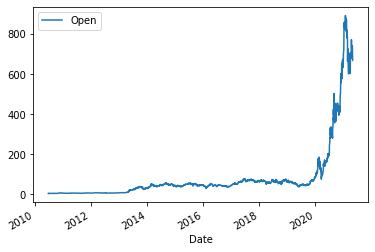

In [14]:
t_stock.reset_index(inplace=True)
t_stock.plot(x="Date", y="Open")

### Q6. Game Stop Stock and Revenue Dashboard

<AxesSubplot:xlabel='Date'>

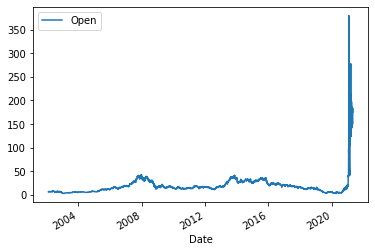

In [41]:
gs_stock.reset_index(inplace=True)
gs_stock.plot(x="Date", y="Open")